# Import Libraries and Tools

In [2]:
# !pip install fuzzy-c-means

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import fcmeans

# Load Dataset

In [11]:
path_dataset = './dataset_kuisioner_modelling.csv'

df = pd.read_csv(path_dataset)

In [12]:
df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.154415,-1.374581,2.212971,-0.613855,-2.290700,-0.861788,-1.042804,3.401723,-0.837952,-0.805054,...,0.277522,0.171264,-0.207455,0.156150,-0.515029,0.252273,-0.205621,0.204573,0.591369,-0.607347
1,1.291225,-1.365399,1.399420,-1.348920,0.804755,-0.399638,2.841903,-0.075348,-0.670732,-1.008303,...,-0.848966,-0.863994,0.434236,-0.198111,-0.734834,-0.720626,-0.050199,-0.875175,0.205732,0.034868
2,-1.822564,2.629616,0.047403,-1.045887,-0.961545,-0.412286,2.459030,0.251762,0.523458,0.371215,...,0.809233,-0.750312,0.351474,0.274437,0.220075,-0.696831,-0.289594,0.252887,1.026055,0.244039
3,-0.446241,0.575860,-2.710459,1.213240,0.115586,-0.184212,1.417889,1.494341,-0.125885,-0.028867,...,0.502970,0.372708,-0.178322,-0.018031,-0.631975,0.840028,-0.559151,0.950841,-0.337224,0.295277
4,4.956216,3.947952,0.634499,0.267457,0.148398,-2.399037,-0.655766,-0.305049,-0.457792,2.079030,...,0.312901,-0.839984,1.104650,-0.393710,-1.138469,0.620253,1.061208,0.047608,-0.254227,-0.242100


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC0     55 non-null     float64
 1   PC1     55 non-null     float64
 2   PC2     55 non-null     float64
 3   PC3     55 non-null     float64
 4   PC4     55 non-null     float64
 5   PC5     55 non-null     float64
 6   PC6     55 non-null     float64
 7   PC7     55 non-null     float64
 8   PC8     55 non-null     float64
 9   PC9     55 non-null     float64
 10  PC10    55 non-null     float64
 11  PC11    55 non-null     float64
 12  PC12    55 non-null     float64
 13  PC13    55 non-null     float64
 14  PC14    55 non-null     float64
 15  PC15    55 non-null     float64
 16  PC16    55 non-null     float64
 17  PC17    55 non-null     float64
 18  PC18    55 non-null     float64
 19  PC19    55 non-null     float64
 20  PC20    55 non-null     float64
dtypes: float64(21)
memory usage: 9.1 KB


In [14]:
df.describe()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
count,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,0.000000,3.310483e-16,-1.836914e-16,1.614870e-17,2.503048e-16,-4.239033e-17,-2.462677e-16,-1.122839e-16,-1.034526e-16,9.689219e-17,...,-3.613271e-16,-1.816729e-16,2.040035e-16,-3.623364e-16,1.836914e-16,1.660288e-16,6.156691e-17,-2.301190e-16,-6.055762e-17,5.223095e-17
std,2.541455,2.382029e+00,1.860798e+00,1.537343e+00,1.412526e+00,1.359770e+00,1.296955e+00,1.107718e+00,1.079434e+00,9.103580e-01,...,8.192360e-01,7.228489e-01,6.904377e-01,6.653521e-01,6.486404e-01,6.329461e-01,6.074070e-01,5.646956e-01,5.538585e-01,5.448627e-01
min,-4.052218,-3.847586e+00,-4.033855e+00,-3.144016e+00,-3.170004e+00,-2.399037e+00,-2.385669e+00,-2.330259e+00,-2.181950e+00,-1.895847e+00,...,-1.768173e+00,-1.397292e+00,-1.388688e+00,-1.319396e+00,-1.593661e+00,-1.336402e+00,-1.160012e+00,-1.053652e+00,-1.109931e+00,-1.186116e+00
25%,-2.053548,-1.721750e+00,-9.810130e-01,-1.082684e+00,-8.347122e-01,-8.658508e-01,-1.032119e+00,-9.097884e-01,-7.896060e-01,-8.075836e-01,...,-5.882376e-01,-5.158630e-01,-4.833081e-01,-3.907511e-01,-4.819735e-01,-4.543834e-01,-4.447049e-01,-3.316432e-01,-4.064220e-01,-3.493876e-01
50%,-0.446241,-5.191635e-01,-2.612602e-04,1.767417e-01,-2.619646e-02,-1.783601e-01,-3.590080e-01,-7.534761e-02,-1.164791e-01,2.972212e-02,...,8.483402e-02,2.157395e-02,-7.081235e-02,-8.838631e-02,-1.059791e-01,1.148192e-01,-5.019880e-02,1.044824e-02,-6.172792e-02,3.486785e-02
75%,1.592184,1.367883e+00,1.111918e+00,1.105701e+00,9.589682e-01,6.448953e-01,9.098899e-01,8.218332e-01,5.971162e-01,5.878168e-01,...,5.103993e-01,4.204323e-01,3.986829e-01,3.476269e-01,4.361941e-01,4.175793e-01,3.947733e-01,2.975598e-01,3.928198e-01,3.089592e-01
max,4.956216,5.528832e+00,4.443356e+00,3.149145e+00,3.395022e+00,3.983770e+00,2.901107e+00,3.401723e+00,2.435082e+00,2.079030e+00,...,1.772946e+00,2.077157e+00,1.603303e+00,2.034923e+00,1.701820e+00,1.341929e+00,1.176503e+00,1.523444e+00,1.283562e+00,1.425905e+00


# Create Clustering Model

## K-Means Clustering

references: <br>
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ <br>

### Determine Total Cluster using Elbow Plot

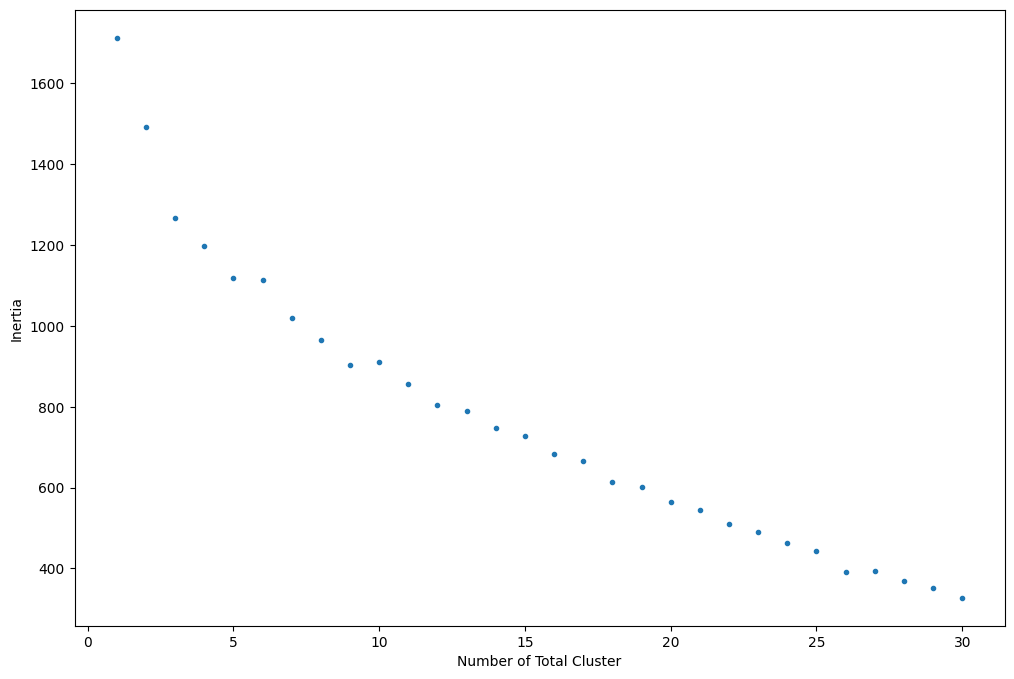

In [15]:
inertia_values = []
max_cluster = 30

for cluster in range(max_cluster):
#     print(cluster)
    kmeans = KMeans(n_clusters=cluster+1, n_init='auto')
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=[12, 8])

plt.plot(np.arange(1, max_cluster+1, step=1), inertia_values, marker='.', linestyle='')

plt.xlabel('Number of Total Cluster')
plt.ylabel('Inertia')

plt.show()

## Fuzzy C-Means Clustering